In [20]:
import numpy as np 
import pandas as pd 
import requests, io 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score

In [21]:
nba_initial = pd.read_csv('cleaned.csv', index_col=[0])
nba_initial

,playerName,seasonStartYear,salary,inflationAdjSalary,birthDate,startYear,position,height,weight,MP,...,FTr,AST,STL,TRB,FT,3P,FG,position_enc,team_enc,height_enc
0,Michael Jordan,1996,"$30,140,000","$52,258,566",1963-02-17,1985.0,G-F,6-6,198.0,3090.0,...,0.355,352.0,180.0,543.0,548.0,111.0,916.0,6,5,14
1,Horace Grant,1996,"$14,857,000","$25,759,971",1965-07-04,1988.0,F-C,6-10,215.0,2286.0,...,0.306,170.0,62.0,580.0,152.0,1.0,347.0,3,26,8
2,Reggie Miller,1996,"$11,250,000","$19,505,934",1965-08-24,1988.0,G-F,6-7,185.0,2621.0,...,0.467,253.0,77.0,214.0,430.0,168.0,504.0,6,13,15
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585",1972-03-06,1993.0,C,7-1,325.0,1946.0,...,0.495,155.0,34.0,596.0,249.0,1.0,592.0,0,26,19
4,Gary Payton,1996,"$10,212,000","$17,706,187",1968-07-23,1991.0,G,6-4,180.0,3162.0,...,0.240,608.0,231.0,339.0,229.0,98.0,618.0,5,32,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10487,Marcus Thornton II,2017,"$46,079","$51,109",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,-1,-1
10488,Jameel Warney,2017,"$46,079","$51,109",1994-01-31,2018.0,F,6-8,260.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,-1,16
10489,Aaron Jackson,2017,"$46,079","$51,109",1986-05-06,2018.0,G,6-4,185.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,-1,12
10490,Trey McKinney-Jones,2017,"$46,079","$51,109",1990-08-27,2018.0,G,6-5,214.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,-1,13


In [22]:
nba = nba_initial.dropna()
nba

,playerName,seasonStartYear,salary,inflationAdjSalary,birthDate,startYear,position,height,weight,MP,...,FTr,AST,STL,TRB,FT,3P,FG,position_enc,team_enc,height_enc
0,Michael Jordan,1996,"$30,140,000","$52,258,566",1963-02-17,1985.0,G-F,6-6,198.0,3090.0,...,0.355,352.0,180.0,543.0,548.0,111.0,916.0,6,5,14
1,Horace Grant,1996,"$14,857,000","$25,759,971",1965-07-04,1988.0,F-C,6-10,215.0,2286.0,...,0.306,170.0,62.0,580.0,152.0,1.0,347.0,3,26,8
2,Reggie Miller,1996,"$11,250,000","$19,505,934",1965-08-24,1988.0,G-F,6-7,185.0,2621.0,...,0.467,253.0,77.0,214.0,430.0,168.0,504.0,6,13,15
3,Shaquille O'Neal,1996,"$10,714,000","$18,576,585",1972-03-06,1993.0,C,7-1,325.0,1946.0,...,0.495,155.0,34.0,596.0,249.0,1.0,592.0,0,26,19
4,Gary Payton,1996,"$10,212,000","$17,706,187",1968-07-23,1991.0,G,6-4,180.0,3162.0,...,0.240,608.0,231.0,339.0,229.0,98.0,618.0,5,32,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,Adreian Payne,2017,"$77,250","$85,683",1991-02-19,2015.0,F-C,6-10,237.0,135.0,...,0.352,7.0,8.0,33.0,14.0,3.0,23.0,3,19,8
10465,James Young,2017,"$77,250","$85,683",1995-08-16,2015.0,G-F,6-6,215.0,220.0,...,0.155,4.0,10.0,26.0,6.0,12.0,25.0,6,1,14
10471,Darrun Hilliard,2017,"$77,250","$85,683",1993-04-13,2016.0,G,6-6,205.0,381.0,...,0.222,33.0,11.0,33.0,21.0,12.0,47.0,5,10,14
10481,Jonathan Gibson,2017,"$74,158","$82,253",1987-11-08,2017.0,G,6-2,185.0,231.0,...,0.305,26.0,8.0,22.0,21.0,15.0,35.0,5,8,10


In [23]:
nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace(',', '')
nba['inflationAdjSalary'] = nba['inflationAdjSalary'].astype(int)
nba['inflationAdjSalary_log'] = nba['inflationAdjSalary'].apply(lambda x: np.log(x))
nba

/var/folders/2w/dyfxg9ln5k96swfq48d47ppc0000gn/T/ipykernel_47796/703286028.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
/var/folders/2w/dyfxg9ln5k96swfq48d47ppc0000gn/T/ipykernel_47796/703286028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
/var/folders/2w/dyfxg9ln5k96swfq48d47ppc0000gn/T/ipykernel_47796/703286028.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,playerName,seasonStartYear,salary,inflationAdjSalary,birthDate,startYear,position,height,weight,MP,...,AST,STL,TRB,FT,3P,FG,position_enc,team_enc,height_enc,inflationAdjSalary_log
0,Michael Jordan,1996,"$30,140,000",52258566,1963-02-17,1985.0,G-F,6-6,198.0,3090.0,...,352.0,180.0,543.0,548.0,111.0,916.0,6,5,14,17.771714
1,Horace Grant,1996,"$14,857,000",25759971,1965-07-04,1988.0,F-C,6-10,215.0,2286.0,...,170.0,62.0,580.0,152.0,1.0,347.0,3,26,8,17.064332
2,Reggie Miller,1996,"$11,250,000",19505934,1965-08-24,1988.0,G-F,6-7,185.0,2621.0,...,253.0,77.0,214.0,430.0,168.0,504.0,6,13,15,16.786229
3,Shaquille O'Neal,1996,"$10,714,000",18576585,1972-03-06,1993.0,C,7-1,325.0,1946.0,...,155.0,34.0,596.0,249.0,1.0,592.0,0,26,19,16.737412
4,Gary Payton,1996,"$10,212,000",17706187,1968-07-23,1991.0,G,6-4,180.0,3162.0,...,608.0,231.0,339.0,229.0,98.0,618.0,5,32,12,16.689425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10461,Adreian Payne,2017,"$77,250",85683,1991-02-19,2015.0,F-C,6-10,237.0,135.0,...,7.0,8.0,33.0,14.0,3.0,23.0,3,19,8,11.358410
10465,James Young,2017,"$77,250",85683,1995-08-16,2015.0,G-F,6-6,215.0,220.0,...,4.0,10.0,26.0,6.0,12.0,25.0,6,1,14,11.358410
10471,Darrun Hilliard,2017,"$77,250",85683,1993-04-13,2016.0,G,6-6,205.0,381.0,...,33.0,11.0,33.0,21.0,12.0,47.0,5,10,14,11.358410
10481,Jonathan Gibson,2017,"$74,158",82253,1987-11-08,2017.0,G,6-2,185.0,231.0,...,26.0,8.0,22.0,21.0,15.0,35.0,5,8,10,11.317555


In [24]:
X = nba[['MP', 'PTS', 'Age', 'games_started', 'PER', 'AST', 'STL', 'TRB', '3P']]
y = nba[['inflationAdjSalary_log']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [27]:
random_forest_model = RandomForestRegressor(n_estimators = 10, random_state = 0)

random_forest_model.fit(X_train, y_train) 

y_pred = random_forest_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2_s=r2_score(y_test, y_pred)
print("MSE: ",mse)
print("r2_socre: ",r2_s)

/var/folders/2w/dyfxg9ln5k96swfq48d47ppc0000gn/T/ipykernel_47796/2376239079.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


MSE:  0.7633663281635471
r2_socre:  0.405503745569724


Text(0.5, 1.0, 'Residual Plot for Random forest')

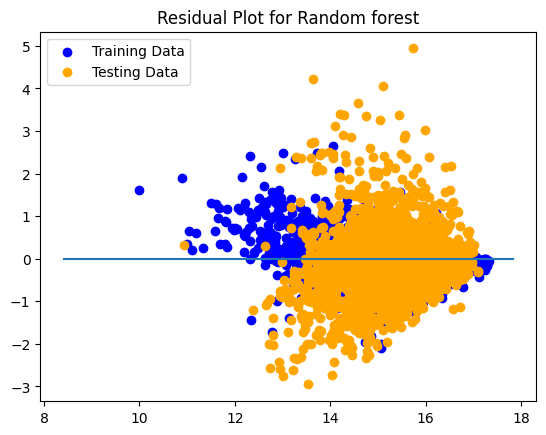

In [29]:
plt.scatter(random_forest_model.predict(X_train), random_forest_model.predict(X_train) - y_train.values.reshape((-1,)), c="blue", label="Training Data")
plt.scatter(random_forest_model.predict(X_test), random_forest_model.predict(X_test) - y_test.values.reshape((-1,)), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot for Random forest")